In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os
from pandas import datetime

<ipython-input-1-2e30aa4ceee0>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


###Getting values of 4 considered stocks

In [13]:
tickers = ['KO', 'PEP', 'TSLA','AAPL', 'WMT', 'TGT']
price = yf.download(tickers, '2012-01-01', '2022-12-31')['Adj Close']
price.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,KO,PEP,TGT,TSLA,WMT
Date,,,,,,
2012-01-03,12.433825,24.140409,46.588135,36.457100,1.872000,15.482292
2012-01-04,12.500645,23.988972,46.826675,35.658375,1.847333,15.323188
2012-01-05,12.639425,23.875406,46.461830,34.595730,1.808000,15.248764
2012-01-06,12.771559,23.723965,45.879475,34.909534,1.794000,15.140986
2012-01-09,12.751298,23.723965,46.118027,34.638535,1.816667,15.187176
2012-01-10,12.796958,23.865070,46.068935,34.795433,1.841333,15.151250
2012-01-11,12.776091,23.424522,45.612865,34.966595,1.882000,15.243631
2012-01-12,12.741018,23.255878,45.339230,35.522865,1.883333,15.269295
2012-01-13,12.693245,23.056261,45.184875,35.529991,1.519333,15.279554


In [14]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2012-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2768 non-null   float64
 1   KO      2768 non-null   float64
 2   PEP     2768 non-null   float64
 3   TGT     2768 non-null   float64
 4   TSLA    2768 non-null   float64
 5   WMT     2768 non-null   float64
dtypes: float64(6)
memory usage: 151.4 KB


In [15]:
price.describe()

Ticker,AAPL,KO,PEP,TGT,TSLA,WMT
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,56.360816,38.363966,96.027216,87.434086,66.687498,28.666855
std,48.238500,9.905526,34.162318,56.165525,99.362267,10.510678
min,11.982237,23.056261,43.978073,34.595730,1.519333,14.818639
25%,21.805663,30.507512,70.832390,48.050807,13.505834,20.258485
50%,35.585117,36.000090,91.236782,61.504181,17.396334,23.701352
75%,75.359324,45.464383,120.591135,108.902765,49.939668,37.583290
max,179.724548,62.817844,179.343628,250.836929,409.970001,51.876926


In [16]:


# Kiểm tra giá trị NaN
has_nan = price.isnull().values.any()

# Kiểm tra giá trị 0
has_zero = (price == 0).values.any()

if has_nan:
    print("price chứa giá trị NaN")
else:
    print("price không chứa giá trị NaN")

if has_zero:
    print("price chứa giá trị 0")
else:
    print("price không chứa giá trị 0")

price không chứa giá trị NaN
price không chứa giá trị 0


###Basic plots

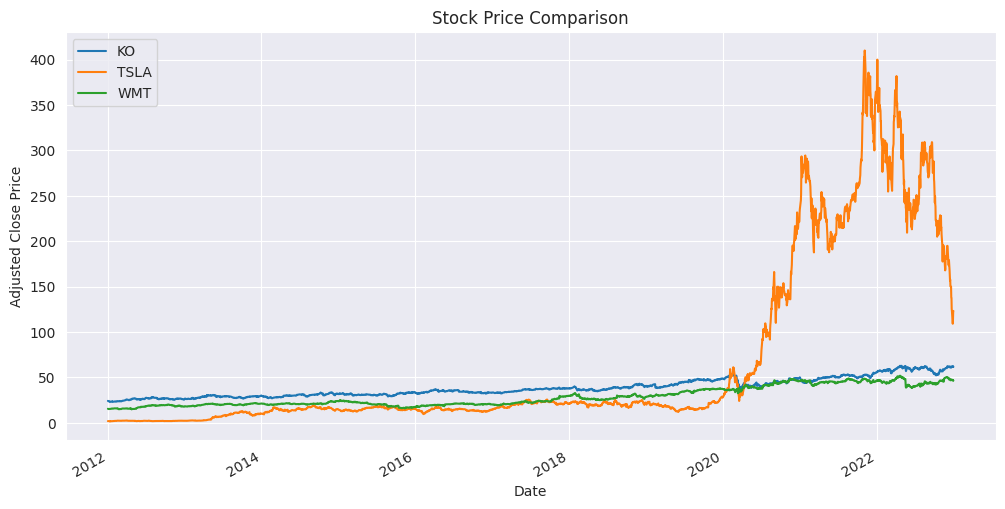

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn 3 cổ phiếu ngẫu nhiên từ danh sách
selected_tickers = ['KO', 'TSLA', 'WMT']  # Chọn 3 cổ phiếu bất kỳ từ danh sách

# Lấy dữ liệu giá đóng cửa của các cổ phiếu được chọn
selected_price = price[selected_tickers]

# Vẽ biểu đồ
sns.set_style("darkgrid")
selected_price.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Price Comparison")
plt.legend(loc="upper left")
plt.show()

###Quantity of each

In [19]:
# Tạo danh sách số lượng cổ phiếu
quantities = [100, 80, 50, 60, 120, 100]

# Tạo DataFrame mới với cột "Ticker" và "Quantity"
portfolio = pd.DataFrame({'Ticker': tickers, 'Quantity': quantities})

print(portfolio)

  Ticker  Quantity
0     KO       100
1    PEP        80
2   TSLA        50
3   AAPL        60
4    WMT       120
5    TGT       100


###Proportion of holding equities

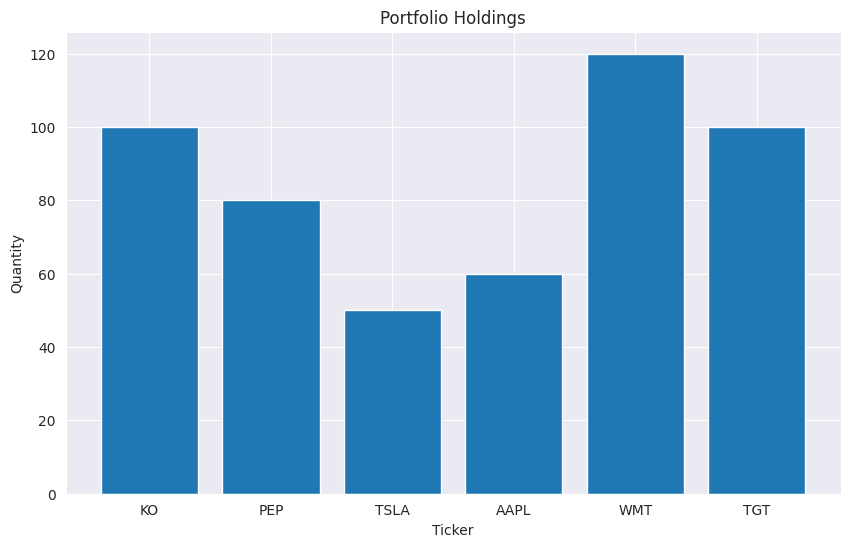

In [20]:
# Lấy thông tin từ DataFrame
tickers = portfolio['Ticker']
quantities = portfolio['Quantity']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(tickers, quantities)
plt.xlabel("Ticker")
plt.ylabel("Quantity")
plt.title("Portfolio Holdings")
plt.show()